<a href="https://colab.research.google.com/github/noman377/datascience/blob/main/bear_detector_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install fastbook

In [5]:
import fastbook
fastbook.setup_book()

In [7]:
from fastbook import *
from fastai.vision.widgets import *

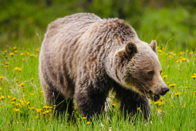

In [9]:
im = Image.open('grizzly.jpg')
im.to_thumb(196,196)

In [10]:
learn_inf = load_learner('export.pkl')

In [11]:
learn_inf.predict('grizzly.jpg')

('grizzly', tensor(1), tensor([6.4445e-04, 9.9935e-01, 7.8483e-06]))

In [12]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [13]:
btn_upload = SimpleNamespace(data = ['grizzly.jpg'])

In [14]:
img = PILImage.create(btn_upload.data[-1])

In [15]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [16]:
pred,pred_idx,probs = learn_inf.predict(img)

In [17]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9993')

In [18]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [19]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [20]:
btn_upload = widgets.FileUpload()

In [21]:
VBox([widgets.Label('Select your bear!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila